# Geiger-Nuttallのプロット
教科書に掲載されているテーブルからGeiger-Nuttallのプロットを作成する。  
事前にテーブルをテキストファイルとして作成する必要がある。  
以下の例ではそれぞれのデータをgroup1.dat, group2.dat, group3,datとしている。  
各データファイルのフォーマットは以下のように取り決める。    

```
半減期 (sec)    放出エネルギー (MeV)     原子番号   質量数  
```

各データファイルからグラフを作成  


In [2]:
auto gr1 = gnMakeGraph("group1.dat");
auto gr2 = gnMakeGraph("group2.dat");
auto gr3 = gnMakeGraph("group3.dat");

キャンパスと全体のレイアウトを決めるからのヒストグラムを作成しておく。

In [3]:
auto c = new TCanvas();
auto h = new TH2D("h","Geiger-Nuttall relation;ZE^{-1/2};log#lambda",200,30,50,160,-80,20);

カラーの設定

In [4]:
gr1->SetFillColor(2);
gr2->SetFillColor(3);
gr3->SetFillColor(4);
gr1->SetMarkerColor(2);
gr2->SetMarkerColor(3);
gr3->SetMarkerColor(4);

フィットする前の状態

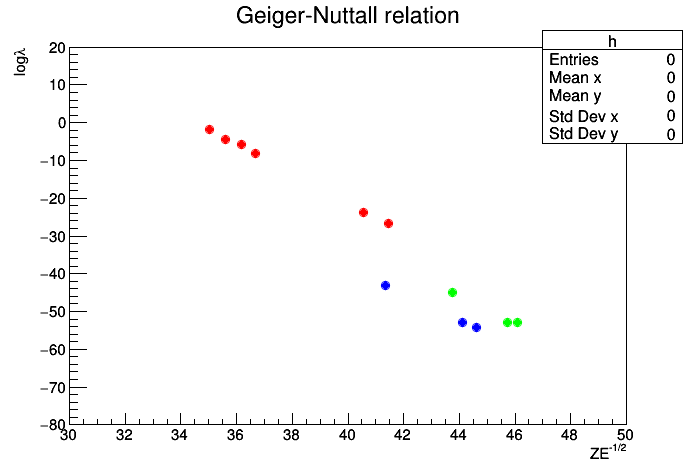

In [5]:
h->Draw();
gr1->Draw("P");
gr2->Draw("P");
gr3->Draw("P");
c->Draw()

group1のデータを直線でフィットする。  
あらかじめline()という関数を準備しておいた。  
次のようにして"l1"という直線を作成する。

In [6]:
auto l1 = line("l1");

グラフ１をl1でフィットする。

In [7]:
gr1->Fit(l1,"0");


****************************************
Minimizer is Minuit / Migrad
Chi2                      =     0.661516
NDf                       =            4
Edm                       =  2.82132e-19
NCalls                    =           38
p0                        =      134.688   +/-   2.51509     
p1                        =     -3.89777   +/-   0.066776    


同様にしてgr2,gr3も直線フィットする。  
group2,3はデータが少ないためスロープはl1の結果を用いることにする。  
以下のようにl1の結果を代入してl2,l3を定義する。

In [8]:
auto l2 = line("l2", -3.89777);
auto l3 = line("l3", -3.89777);

gr2, gr3を直線フィット  
出力からスロープパラメータは固定(fix)されているのがわかる。

In [10]:
gr2->Fit(l2,"0");
gr3->Fit(l3,"0");


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      1.05637
NDf                       =            2
Edm                       =  1.25704e-26
NCalls                    =           13
p0                        =      125.965   +/-   0.419596    
p1                        =     -3.89777                      	 (fixed)

****************************************
Minimizer is Minuit / Migrad
Chi2                      =      1.52472
NDf                       =            2
Edm                       =  2.55963e-25
NCalls                    =           13
p0                        =      118.954   +/-   0.504104    
p1                        =     -3.89777                      	 (fixed)


最終結果を表示する。

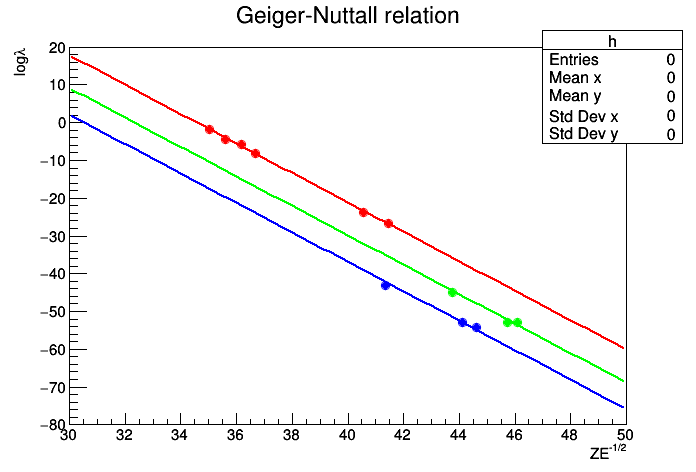

In [12]:
h->Draw();
gr1->Draw("P");
gr2->Draw("P");
gr3->Draw("P");
l1->SetLineColor(2);
l1->Draw("same");
l2->SetLineColor(3);
l2->Draw("same");
l3->SetLineColor(4);
l3->Draw("same");
c->Draw()

定数項が知りたいのでフィットした直線のパラメータをとってくる。

In [13]:
std::cout << "C1 " << l1->GetParameter(0) << std::endl;
std::cout << "C2 " << l2->GetParameter(0) << std::endl;
std::cout << "C3 " << l3->GetParameter(0) << std::endl;

C1 134.688
C2 125.965
C3 118.954
